<div style="text-align: center;">
    <h2>DATAS</h2>
</div>

In [45]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'DATA\ds_salaries.csv')

In [25]:
df.head(9)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M


In [4]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [5]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.shape[0]

3755

In [8]:
df.duplicated().sum()

np.int64(1171)

In [9]:
df.drop_duplicates(inplace=True)

<div style="text-align: center;">
    <h2>EDA</h2>
</div>

## ¿Cual es el tipo de empleo que gana mas dinero?

In [10]:
df['salary'].max()

np.int64(30400000)

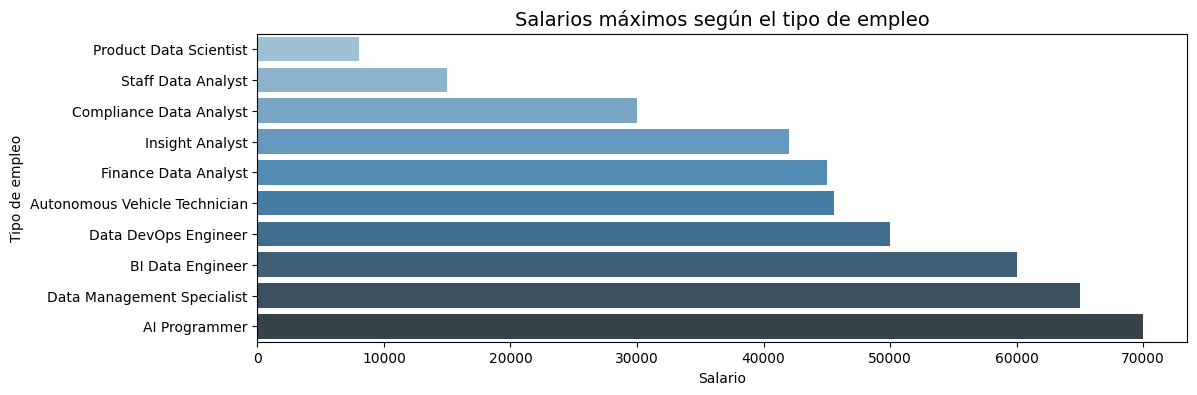

In [46]:
Salarios_empleo = df.groupby('job_title')['salary'].max().sort_values().head(10)
plt.figure(figsize=(12,4))
sns.barplot(x=Salarios_empleo.values, y=Salarios_empleo.index, palette="Blues_d")
plt.title('Salarios máximos según el tipo de empleo', fontsize=14)
plt.xlabel('Salario')
plt.ylabel('Tipo de empleo')
plt.show()

 El gráfico muestra los salarios máximos de los 10 tipos de empleo más altos, el cual revela significativas diferencias entre roles. Esto nos permite identificar que empleos son más lucrativos en el mercado laboral actual.

In [11]:
df_dinero = df.groupby('job_title')['salary'].mean().reset_index()
print(df_dinero)

                        job_title         salary
0   3D Computer Vision Researcher  120000.000000
1                    AI Developer  137181.818182
2                   AI Programmer   55000.000000
3                    AI Scientist  275312.500000
4              Analytics Engineer  149001.758242
..                            ...            ...
88              Research Engineer  165510.727273
89             Research Scientist  152924.600000
90         Software Data Engineer   75000.000000
91             Staff Data Analyst   15000.000000
92           Staff Data Scientist  105000.000000

[93 rows x 2 columns]


## ¿Cual es el tipo de empleo que permite mas trabajo remoto?

In [12]:
df['remote_ratio'].value_counts()

remote_ratio
100    1211
0      1186
50      187
Name: count, dtype: int64

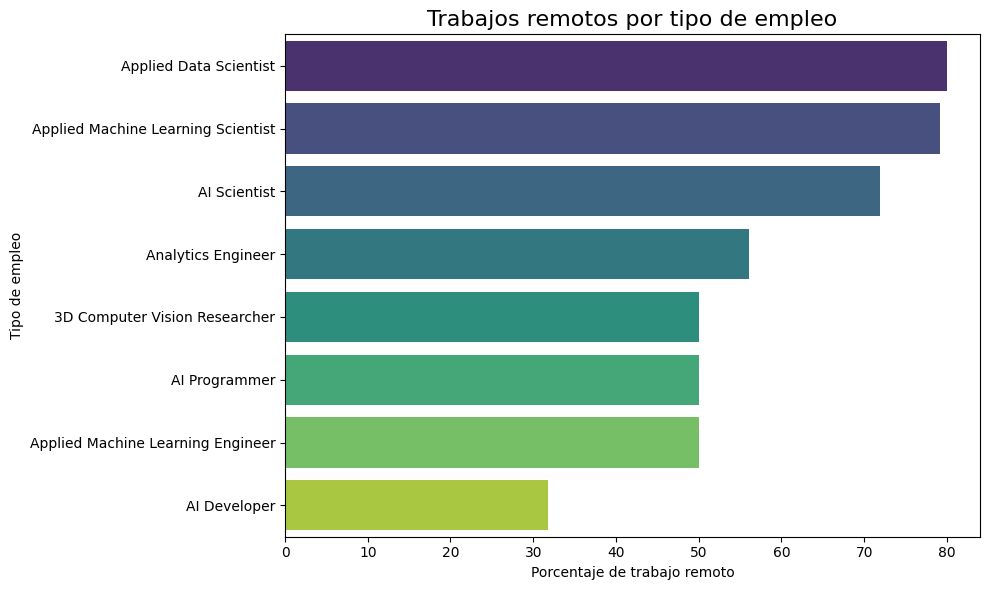

In [87]:
df_remoto =  df.groupby('job_title')['remote_ratio'].mean().reset_index().head(8)
df_remoto = df_remoto.sort_values(by='remote_ratio', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='remote_ratio', y='job_title', data=df_remoto, palette='viridis')
plt.title('Trabajos remotos por tipo de empleo', fontsize=16)
plt.xlabel('Porcentaje de trabajo remoto')
plt.ylabel('Tipo de empleo')
plt.tight_layout()
plt.show()

Este gráfico nos muestra el porcentaje promedio de trabajo remoto para, en este caso, los ocho tipos de empleo mas destacados. Así nos permite identificar que roles nos permiten mayor flexibilidad de teletrabajo.

In [13]:
df_remoto = df.groupby('job_title')['remote_ratio'].mean().reset_index()
print(df_remoto)

                        job_title  remote_ratio
0   3D Computer Vision Researcher     50.000000
1                    AI Developer     31.818182
2                   AI Programmer     50.000000
3                    AI Scientist     71.875000
4              Analytics Engineer     56.043956
..                            ...           ...
88              Research Engineer     21.212121
89             Research Scientist     34.615385
90         Software Data Engineer     75.000000
91             Staff Data Analyst      0.000000
92           Staff Data Scientist    100.000000

[93 rows x 2 columns]


## ¿Cual es el salario promedio de los empleados de Data Scientist?

In [14]:
df_mediasalario = df['salary'].mean().round(2)
print(df_mediasalario)

210365.3


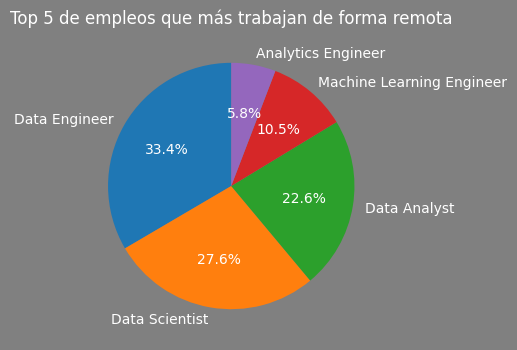

In [78]:
top_5_remote = df[df['remote_ratio'] == 100]['job_title'].value_counts().head(5).reset_index()
plt.figure(figsize=(4,4), facecolor='grey')
plt.pie(top_5_remote['count'], labels=top_5_remote['job_title'], autopct='%1.1f%%', startangle=90, textprops={'color':'white'}) 
plt.title('Top 5 de empleos que más trabajan de forma remota', color='white')
plt.show()

Este gráfico de tarta nos muestra los cinco tipos de empleo que permiten teletrabajo al 100%. Cada segmento representa la proporción de cada empleo en relación con el total.

## ¿Cuantas personas ganan por encima de los 200ks?

In [15]:
df[df['salary']>200_000].shape[0]

450

In [16]:
sum(df['salary']>200_000)

450

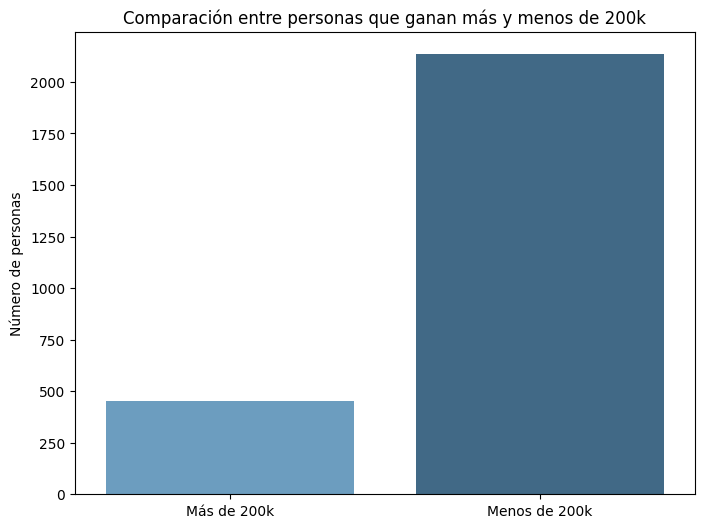

In [86]:
mas_de_200k = df[df['salary'] > 200000].shape[0]
menos_de_200k = df.shape[0] - mas_de_200k
labels = ['Más de 200k', 'Menos de 200k']
values = [mas_de_200k, menos_de_200k]  
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=values, palette='Blues_d')
plt.title('Comparación entre personas que ganan más y menos de 200k')
plt.ylabel('Número de personas')
plt.show()

Este gráfico de barras compara el número de personas que ganan mas de 200k con aquellos que ganan menos de 200k. Se observa que la mayoría de empleados está en la categoria de menos de 200k.

## ¿Cual es el salario promedio de los empleados Data Modeler en SE?

In [17]:
promedio = df[(df['job_title'] == 'Data Modeler') & (df['experience_level'] == 'SE')]['salary_in_usd'].mean().round(2)
promedio

np.float64(118900.0)

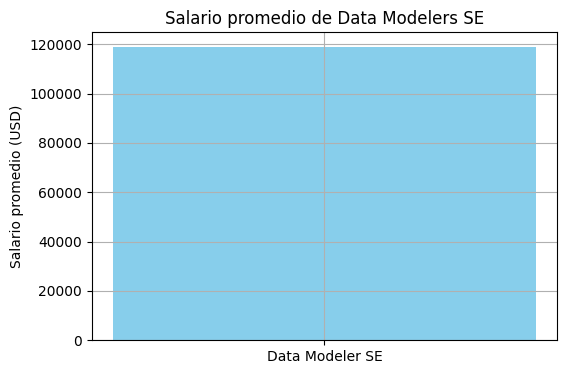

In [90]:
data_modeler_se = df[(df['job_title'] == 'Data Modeler') & (df['experience_level'] == 'SE')]
salario_promedio = data_modeler_se['salary_in_usd'].mean()
plt.figure(figsize=(6,4))
plt.bar('Data Modeler SE', salario_promedio, color='skyblue')
plt.title('Salario promedio de Data Modelers SE')
plt.ylabel('Salario promedio (USD)')
plt.grid()
plt.show()

En este gráfico vemos el salario promedio de los Data Modeler con experiencia SE (Senior). Destaca claramente el ingreso promedio en este rol, proporcionando una referencia rápida sobre la compensación que se puede esperar en esta posición.

## Para los ML Engineer, ¿que diferencia de salario hay entre full time y part time?

In [18]:
salary_FT = df[['employment_type','salary_in_usd']][df['job_title']=='ML Engineer'].groupby('employment_type').mean().loc['FT']
salary_PT = df[['employment_type','salary_in_usd']][df['job_title']=='ML Engineer'].groupby('employment_type').mean().loc['PT']
salary_FT-salary_PT

salary_in_usd    152117.9
dtype: float64

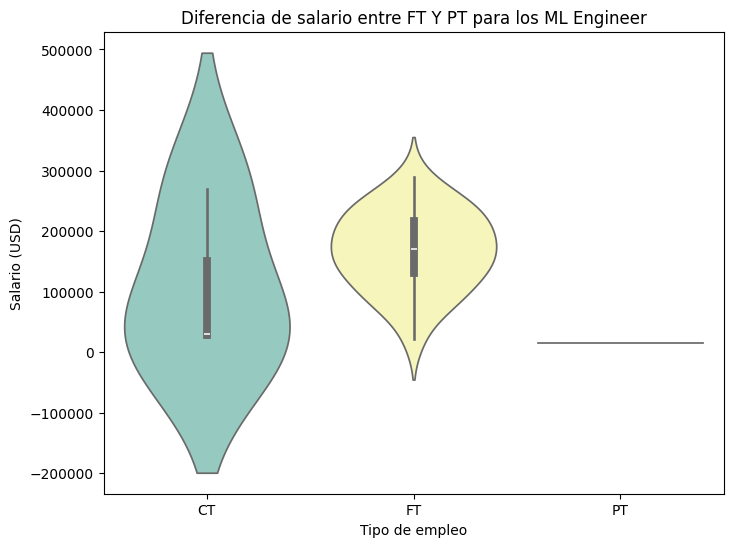

In [92]:
ml_engineer = df[(df['job_title'] == 'ML Engineer')]
plt.figure(figsize=(8,6))
sns.violinplot(x='employment_type', y='salary_in_usd', data=ml_engineer, palette='Set3')
plt.title('Diferencia de salario entre FT Y PT para los ML Engineer')
plt.xlabel('Tipo de empleo')
plt.ylabel('Salario (USD)')
plt.show()


En este gráfico de violín vemos la distribución de salarios para los ML Engineers aegún el tipo de empleo (Full time vs Part time). Revela no solo la media de los salarios, sino tambien la variabilidad y la forma de la distribución para cada tipo de empleo.

## ¿Cual es el employment type mas frecuente entre los Business Data Analyst?

In [19]:
df[['employment_type','job_title']][df['job_title'] == 'Business Data Analyst'].value_counts()

employment_type  job_title            
FT               Business Data Analyst    14
CT               Business Data Analyst     1
Name: count, dtype: int64

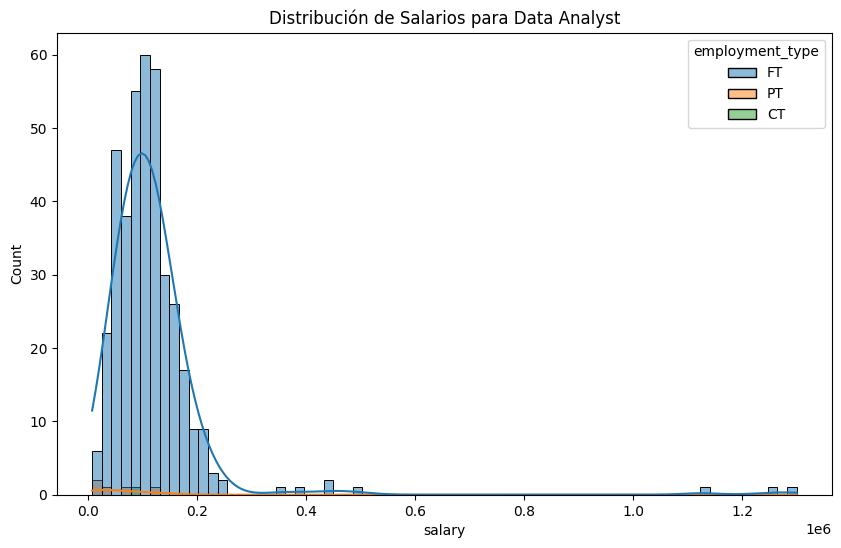

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['job_title'] == 'Data Analyst'], x='salary', hue='employment_type', kde=True)
plt.title('Distribución de Salarios para Data Analyst')
plt.show()

Este gráfico de histograma muestra la distribución de salarios para los Data Analyst, diferenciando entre los tipos de empleo (full time y part time) mediante el uso de colores. La superposición d ela curva dd densidad proporciona una visión clara de cómo se distribuyen los salarios en cada categoría.

## ¿En qué país, en cuanto a localización de la compañía, hay mayor ratio de teletrabajo?

In [20]:
localizacion = df.groupby(['company_location'])['remote_ratio'].mean().sort_values(ascending=False).head(10)
localizacion[localizacion==100.0]

company_location
AR    100.0
KE    100.0
MY    100.0
NG    100.0
EG    100.0
CR    100.0
CF    100.0
CL    100.0
PH    100.0
PL    100.0
Name: remote_ratio, dtype: float64

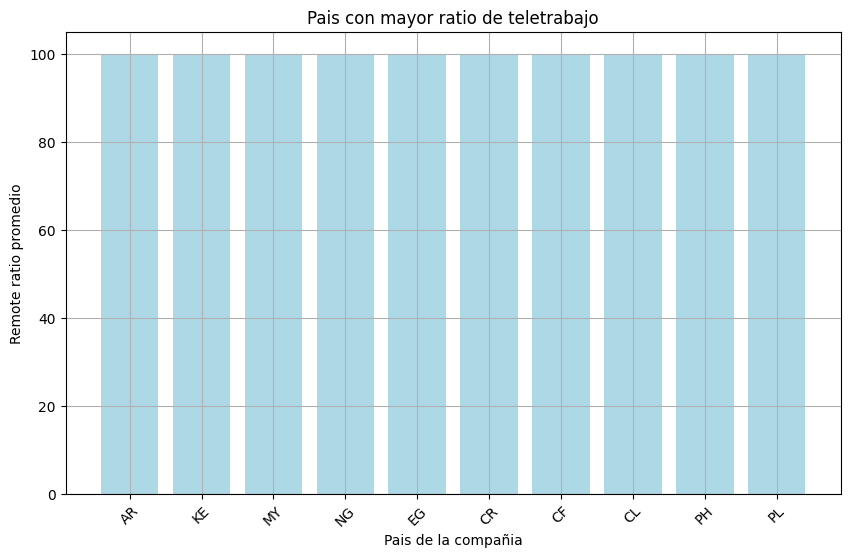

In [106]:
remote_ratio_by_location = df.groupby('company_location')['remote_ratio'].mean().reset_index()
remote_ratio_by_location = remote_ratio_by_location.sort_values(by='remote_ratio', ascending=False)
top_10_remote_ratio_by_location = remote_ratio_by_location.head(10)
plt.figure(figsize=(10,6))
plt.bar(top_10_remote_ratio_by_location['company_location'], top_10_remote_ratio_by_location['remote_ratio'], color='lightblue')
plt.title('Pais con mayor ratio de teletrabajo')
plt.xlabel('Pais de la compañia')
plt.ylabel('Remote ratio promedio')
plt.xticks(rotation=45)
plt.grid()
plt.show()

El gráfico de barras presenta los 10 países con el mayor ratio promedio de teletrabajo. Cada barra representa la media del ratio de teletrabajo en la compañias de cada país, permitiendo una comparación clara entre ellos.